# Import Library

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2

# Gathering Data
Skip this step if you already have the final data

**Jump over modelling step**

In [20]:
shutil.rmtree('data', ignore_errors=True)

In [21]:
! mkdir data

## Download Dataset from Kaggle

In [22]:
! pip install kaggle

### Initialize Kaggle

In [23]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### Download shayanriyaz Dataset
Classes (train:val) : BrownSpot (418:105), Healthy (1191:297), Hispa (452:113), LeafBlast (623:156)

In [24]:
! kaggle datasets download -d shayanriyaz/riceleafs
! mkdir data/shayanriyaz
! unzip riceleafs.zip -d data/shayanriyaz
os.remove('riceleafs.zip')

Streaming output truncated to the last 5000 lines.
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144628.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144631.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144637.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144641.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144645.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144647.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144651.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144654.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144656.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144658.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144730.jpg  
  inflating: data/shayanriyaz/RiceLeafs/train/Hispa/IMG_20190419_144733.jpg  
  inflating: 

### Download chandrug Dataset
Classes : Leaf smut (40), Brown spot (40), Blast (80), Blight (80), Tungro (80)

In [25]:
! kaggle datasets download -d chandrug/riceleafdisease
! mkdir data/chandrug
! unzip riceleafdisease.zip -d data/chandrug
os.remove('riceleafdisease.zip')

 79% 33.0M/41.8M [00:00<00:00, 44.7MB/s]
100% 41.8M/41.8M [00:00<00:00, 51.4MB/s]
Archive:  riceleafdisease.zip
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_0.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_1.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_10.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_11.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_12.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_13.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_14.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_15.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_16.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_17.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spot/Brown_spot_18.jpg  
  inflating: data/chandrug/rice-leaf-disease/Brown spo

### Download tedisetiady Dataset
Classes : Blast (80), Blight (80), Tungro (80)

In [26]:
! kaggle datasets download -d tedisetiady/leaf-rice-disease-indonesia
! mkdir data/tedisetiady
! unzip leaf-rice-disease-indonesia.zip -d data/tedisetiady
os.remove('leaf-rice-disease-indonesia.zip')

 23% 5.00M/21.6M [00:00<00:00, 33.9MB/s]
100% 21.6M/21.6M [00:00<00:00, 104MB/s] 
Archive:  leaf-rice-disease-indonesia.zip
  inflating: data/tedisetiady/blast/IMG_0448.jpg  
  inflating: data/tedisetiady/blast/IMG_0535.jpg  
  inflating: data/tedisetiady/blast/IMG_0536.jpg  
  inflating: data/tedisetiady/blast/IMG_0541.jpg  
  inflating: data/tedisetiady/blast/IMG_0543.jpg  
  inflating: data/tedisetiady/blast/IMG_0544.jpg  
  inflating: data/tedisetiady/blast/IMG_0545.jpg  
  inflating: data/tedisetiady/blast/IMG_0546.jpg  
  inflating: data/tedisetiady/blast/IMG_0547.jpg  
  inflating: data/tedisetiady/blast/IMG_0548.jpg  
  inflating: data/tedisetiady/blast/IMG_0549.jpg  
  inflating: data/tedisetiady/blast/IMG_0550.jpg  
  inflating: data/tedisetiady/blast/IMG_0551.jpg  
  inflating: data/tedisetiady/blast/IMG_0553.jpg  
  inflating: data/tedisetiady/blast/IMG_0557.jpg  
  inflating: data/tedisetiady/blast/IMG_0558.jpg  
  inflating: data/tedisetiady/blast/IMG_0559.jpg  
  inflati

### Download vbookshelf Dataset
Classes : Leaf smut (40), Brown spot (40), Blight (40)

In [27]:
! kaggle datasets download -d vbookshelf/rice-leaf-diseases
! mkdir data/vbookshelf
! unzip rice-leaf-diseases.zip -d data/vbookshelf
os.remove('rice-leaf-diseases.zip')

 90% 33.0M/36.7M [00:00<00:00, 93.9MB/s]
100% 36.7M/36.7M [00:00<00:00, 90.5MB/s]
Archive:  rice-leaf-diseases.zip
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0365.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0366.jpg  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0367.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0370.jpg  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0372.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0373.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0374.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0375.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0376.JPG  
  inflating: data/vbookshelf/rice_leaf_diseases/Bacterial leaf blight/DSC_0377.JPG  
  inflating: data/vbookshelf/rice_l

## Mixed Dataset

In [28]:
diseases = ("LeafSmut", "BrownSpot", "Blight", "Blast", "Tungro", "Hispa", "Healthy")
dataset_dir = 'data/mixed'
alldata_dir = 'data/mixed/alldata'

In [29]:
os.mkdir(dataset_dir)
os.mkdir(alldata_dir)
for disease in diseases:
  os.mkdir(os.path.join(alldata_dir, disease))

In [30]:
def copy_to_mixed_dataset(base_source_dir, source_list, target_list):
  for index, value in enumerate(source_list):
    dest_dir = os.path.join(alldata_dir, target_list[index])
    source_dir = os.path.join(base_source_dir, source_list[index])
    list_data = os.listdir(source_dir)

    for data in list_data:
      if data in os.listdir(dest_dir):
        continue
      source = os.path.join(source_dir, data)
      dest = os.path.join(dest_dir, data)
      shutil.copy(source, dest)

### Copy shayanriyaz Dataset

#### train dir

In [31]:
base_source_dir = 'data/shayanriyaz/RiceLeafs/train'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']


In [32]:
target_list = ['BrownSpot', 'Healthy', 'Hispa', 'Blast']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'Healthy', 'Hispa', 'Blast']


In [33]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

#### val dir

In [34]:
base_source_dir = 'data/shayanriyaz/RiceLeafs/validation'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']


In [35]:
target_list = ['BrownSpot', 'Healthy', 'Hispa', 'Blast']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'Healthy', 'Hispa', 'Blast']


In [36]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy chandrug Dataset

In [37]:
base_source_dir = 'data/chandrug/rice-leaf-disease'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['Brown spot', 'Leaf smut', 'blast', 'blight', 'tungro']


In [38]:
target_list = ['BrownSpot', 'LeafSmut', 'Blast', 'Blight', 'Tungro']
print("Directory destination :", target_list)

Directory destination : ['BrownSpot', 'LeafSmut', 'Blast', 'Blight', 'Tungro']


In [39]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy tedisetiady Dataset

In [40]:
base_source_dir = 'data/tedisetiady/'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['blast', 'blight', 'tungro']


In [41]:
target_list = ['Blast', 'Blight', 'Tungro']
print("Directory destination :", target_list)

Directory destination : ['Blast', 'Blight', 'Tungro']


In [42]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

### Copy vbookshelf Dataset

In [43]:
base_source_dir = 'data/vbookshelf/rice_leaf_diseases'
source_list = os.listdir(base_source_dir)
source_list.sort()
print("Directory source :", source_list)

Directory source : ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [44]:
target_list = ['Blight', 'BrownSpot', 'LeafSmut']
print("Directory destination :", target_list)

Directory destination : ['Blight', 'BrownSpot', 'LeafSmut']


In [45]:
copy_to_mixed_dataset(base_source_dir, source_list, target_list)

## Result Mixed Dataset

In [46]:
print("Total data from each class disease:")
for disease in diseases:
  list_file = os.listdir(os.path.join(alldata_dir, disease))
  print('{}: {} images'.format(disease, len(list_file)))

Total data from each class disease:
LeafSmut: 80 images
BrownSpot: 603 images
Blight: 200 images
Blast: 939 images
Tungro: 160 images
Hispa: 565 images
Healthy: 1488 images


# Exploratory Data Analysis

show the data distribution

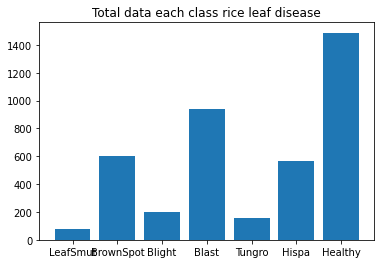

In [47]:
dict_diseases = {}

for disease in diseases:
  list_file = os.listdir(os.path.join(alldata_dir, disease))
  dict_diseases[disease] = len(list_file)

plt.figure(figsize=(6,4))
plt.bar(x=dict_diseases.keys(), height=dict_diseases.values())
plt.title("Total data each class rice leaf disease")
plt.show()

show example image


LeafSmut


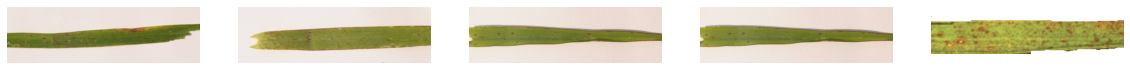


Healthy


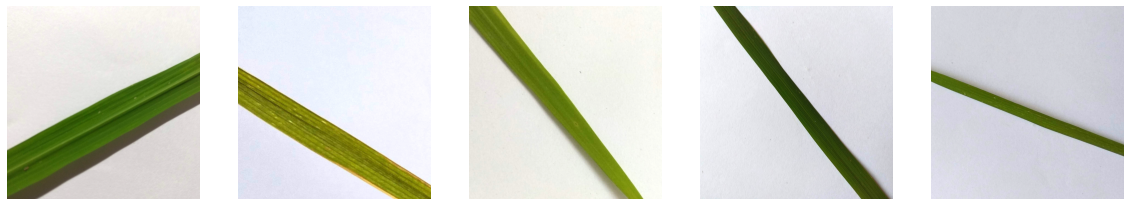


Blight


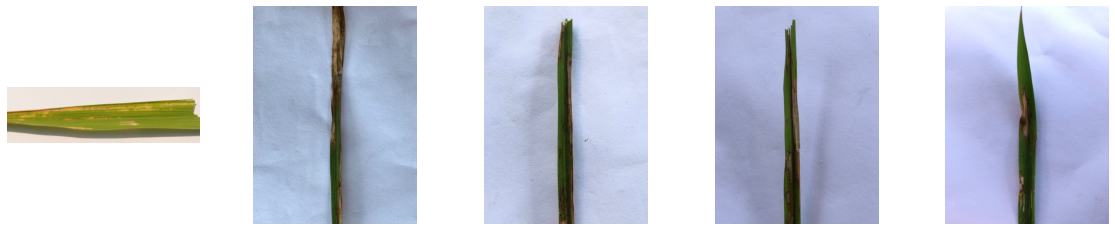


Hispa


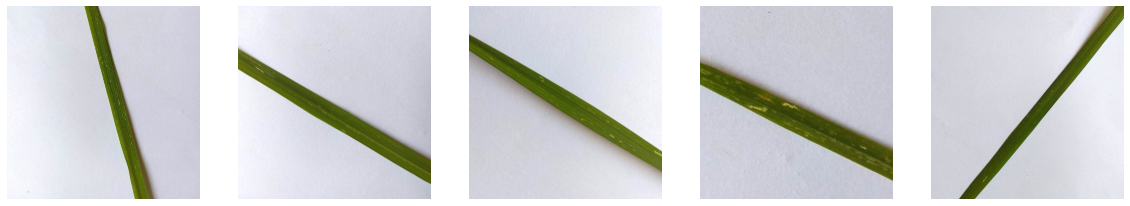


BrownSpot


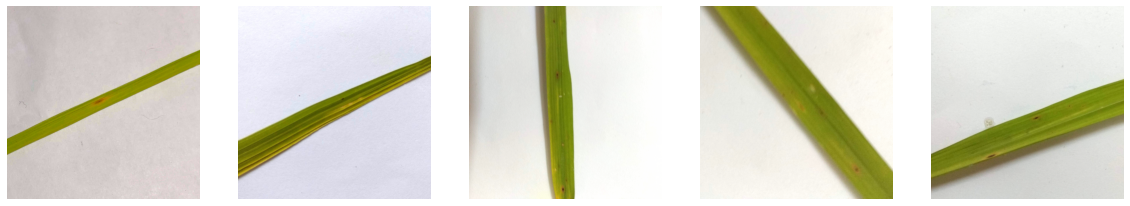


Blast


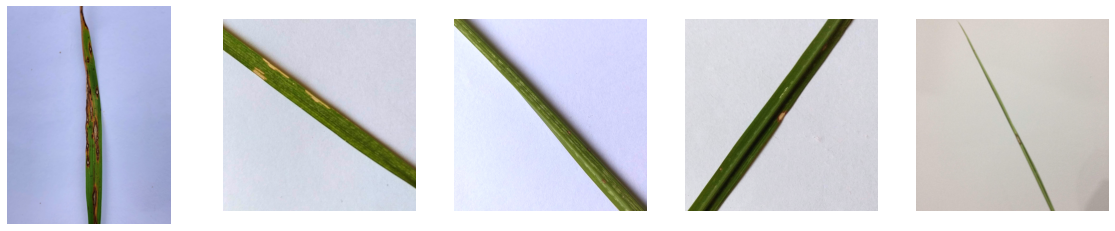


Tungro


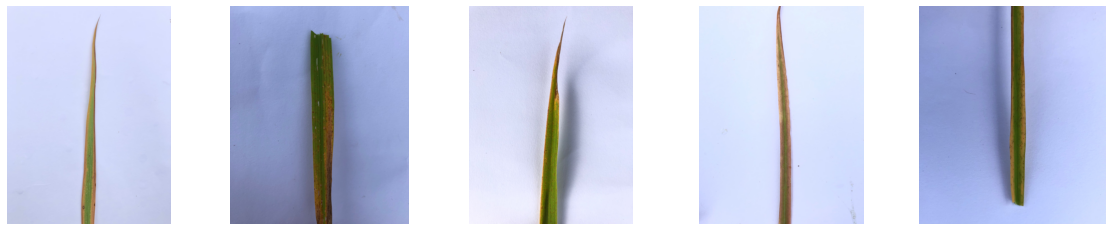

In [48]:
list_data_class = os.listdir(alldata_dir)
for item in list_data_class:
  print("")
  print(item)
  class_dir = os.path.join(alldata_dir, item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

show minimum and maximum image dimension each class

In [49]:
list_data_class = os.listdir(alldata_dir)
for item in list_data_class:
  dir = os.path.join(alldata_dir, item)
  print(item)
  
  max_h, min_h, max_w, min_w = 0, 99999, 0, 99999

  for img_name in os.listdir(dir):
    img_path = os.path.join(dir, img_name)
    img = Image.open(img_path)
    
    w, h = img.size
    if w > max_w: max_w = w
    if w < min_w: min_w = w
    if h > max_h: max_h = h
    if h < min_h: min_h = h
  
  print("min width: {} , max width: {}".format(min_w, max_w))
  print("min height: {} , max height: {}".format(min_h, max_h))
  print("")

LeafSmut
min width: 250 , max width: 4160
min height: 71 , max height: 2340

Healthy
min width: 826 , max width: 3120
min height: 826 , max height: 3120

Blight
min width: 1291 , max width: 3081
min height: 897 , max height: 1920

Hispa
min width: 877 , max width: 3120
min height: 877 , max height: 3120

BrownSpot
min width: 286 , max width: 3120
min height: 88 , max height: 3120

Blast
min width: 734 , max width: 3120
min height: 734 , max height: 3120

Tungro
min width: 1313 , max width: 1970
min height: 1920 , max height: 1920



**Conclusion:**

data must be reproduced and resized for better data distribution

# Data Preprocessing & Augmentation

## Load image array and preprocessing image

In [50]:
def load_image_array(alldata_dir, disease):
  temp_dis_dir = os.path.join(alldata_dir, disease)
  temp_files = os.listdir(temp_dis_dir)
  temp_paths = [os.path.join(temp_dis_dir, file) for file in temp_files]
  temp_imgs = [read_image(file) for file in temp_paths]

  return np.array(temp_imgs)

def image_pixel_normalization(image):
  """
  transform image to same size without cropping the image
  e.g. image size : (200, 600) => (600, 600)
  """
  h, w, _ = image.shape

  norm_size = h if h > w else w
  
  add_h = norm_size - h
  add_w = norm_size - w 
  
  start_add_h = add_h // 2
  start_add_w = add_w // 2

  new_img = np.full((norm_size, norm_size, 3), 255, dtype=np.uint8)
  new_img[start_add_h:start_add_h + h, start_add_w:start_add_w + w, :] = image
  
  return new_img

def preprocessing(image):
  """
  preprocessing image including size normalization and resize image
  """
  img = image_pixel_normalization(image)
  img = cv2.resize(img, (400, 400), interpolation = cv2.INTER_AREA)
  return np.array(img)

def read_image(image_file):
  img = cv2.imread(image_file)
  img = preprocessing(img)
  return np.array(img)

In [51]:
disease_imgs = {}

for disease in diseases:
  disease_imgs[disease] = load_image_array(alldata_dir, disease)
  print(disease, "done") 

disease_imgs.keys()

LeafSmut done
BrownSpot done
Blight done
Blast done
Tungro done
Hispa done
Healthy done


dict_keys(['LeafSmut', 'BrownSpot', 'Blight', 'Blast', 'Tungro', 'Hispa', 'Healthy'])

In [52]:
disease_imgs['LeafSmut'].shape

(80, 400, 400, 3)

## Augmentating image

In [87]:
shutil.rmtree('data/mixed/finaldata', ignore_errors=True)

In [88]:
# final data dir
finaldata_dir = "data/mixed/finaldata"

In [89]:
os.mkdir(finaldata_dir)
for disease in diseases:
  os.mkdir(os.path.join(finaldata_dir, disease))

### Initialized Image Data Generator Augmentation

In [90]:
datagen = ImageDataGenerator(
            rotation_range=25, # rotation
            width_shift_range=0.15, # horizontal shift
            height_shift_range=0.15, # vertical shift
            zoom_range=0.1, # zoom
            horizontal_flip=True, # horizontal flip
            vertical_flip=True, # vertical flip
            brightness_range=[0.75,1.25], # brightness
          )

def generate_image(datagen, data, amount, savepath=None):
  # prepare iterator
  it = datagen.flow(
        data, 
        batch_size=1, 
        save_to_dir=savepath,
        save_prefix='',
        save_format='png',
      )
  
  # generate samples and plot
  for i in range(amount):
    batch = it.next()
    image = batch[0].astype('uint8')

### Iterate all class diseases and generate new 1000 image data each class

In [91]:
diseases

('LeafSmut', 'BrownSpot', 'Blight', 'Blast', 'Tungro', 'Hispa', 'Healthy')

In [92]:
amount = 1000

for idx, disease in enumerate(diseases):
  save_path = os.path.join(finaldata_dir, disease)
  generate_image(datagen, disease_imgs[disease], amount, save_path)
  print("{} (done) : {}".format(disease, len(os.listdir(save_path))))

LeafSmut (done) : 1000
BrownSpot (done) : 1000
Blight (done) : 1000
Blast (done) : 1000
Tungro (done) : 1000
Hispa (done) : 1000
Healthy (done) : 1000


In [93]:
!zip -r finaldata.zip data/mixed/finaldata

Streaming output truncated to the last 5000 lines.
  adding: data/mixed/finaldata/Blight/_113_9536.png (deflated 0%)
  adding: data/mixed/finaldata/Blight/_12_1764.png (deflated 0%)
  adding: data/mixed/finaldata/Blight/_22_649.png (deflated 2%)
  adding: data/mixed/finaldata/Blight/_52_4803.png (deflated 0%)
  adding: data/mixed/finaldata/Blight/_146_8642.png (deflated 0%)
  adding: data/mixed/finaldata/Blight/_102_4908.png (deflated 0%)
  adding: data/mixed/finaldata/Blight/_39_3099.png (deflated 0%)
  adding: data/mixed/finaldata/Blight/_29_7196.png (deflated 0%)
  adding: data/mixed/finaldata/Blight/_136_4073.png (deflated 0%)
  adding: data/mixed/finaldata/Blight/_156_3679.png (deflated 0%)
  adding: data/mixed/finaldata/Blight/_195_8882.png (deflated 0%)
  adding: data/mixed/finaldata/Blight/_108_5526.png (deflated 0%)
  adding: data/mixed/finaldata/Blight/_131_1246.png (deflated 2%)
  adding: data/mixed/finaldata/Blight/_191_2369.png (deflated 0%)
  adding: data/mixed/finaldata/

show result augmented image


LeafSmut


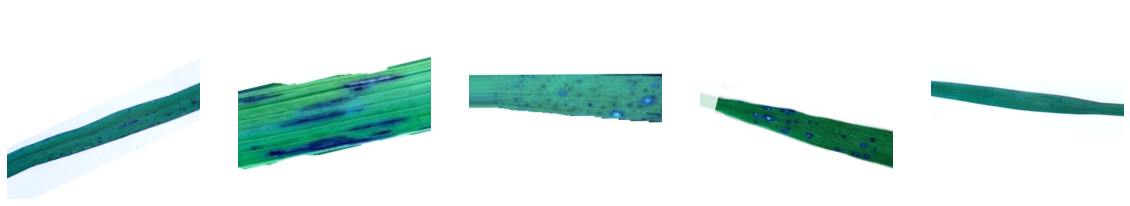


Healthy


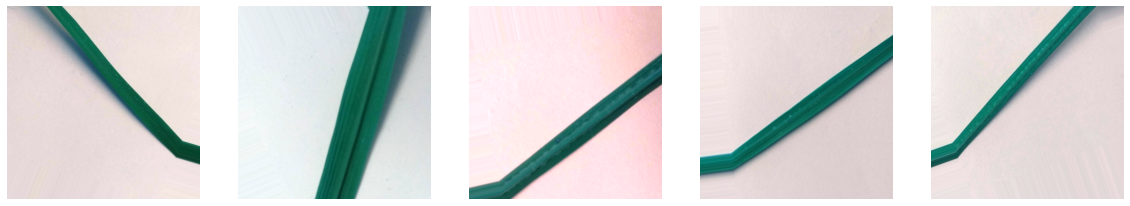


Blight


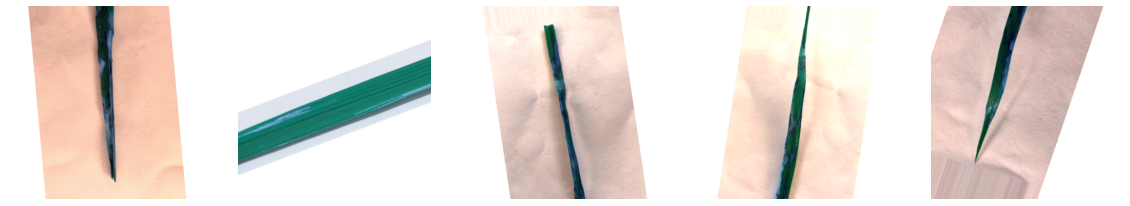


Hispa


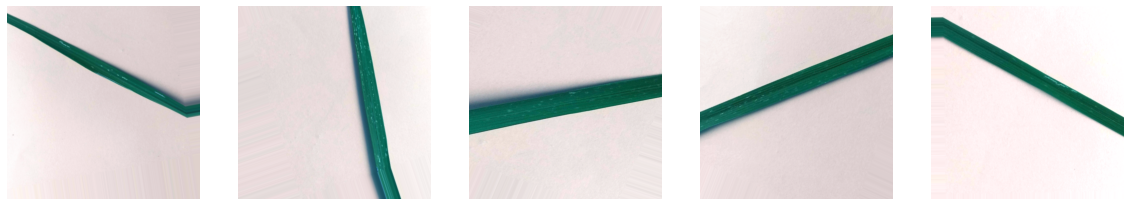


BrownSpot


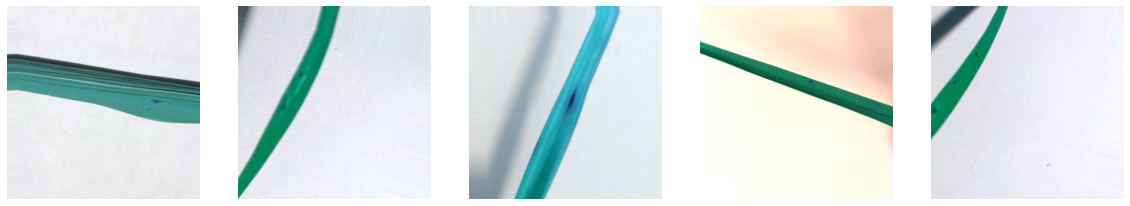


Blast


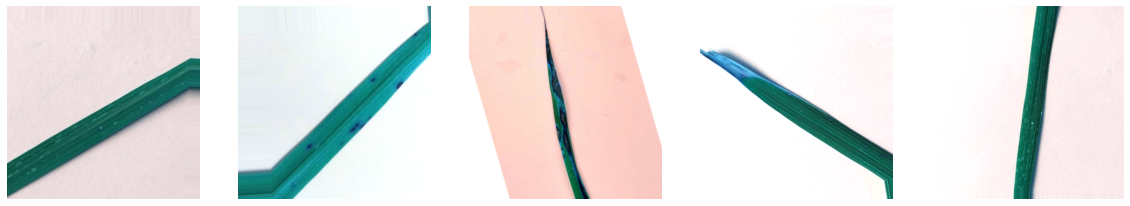


Tungro


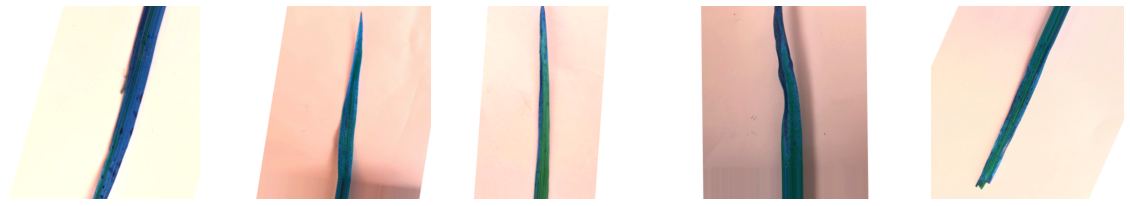

In [94]:
list_data_class = os.listdir(finaldata_dir)
for item in list_data_class:
  print("")
  print(item)
  class_dir = os.path.join(finaldata_dir, item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

# Data Modelling

load final data from drive

In [3]:
# extract zip file
! unzip "drive/MyDrive/Colab Notebooks/res/finaldata.zip" -d .

Streaming output truncated to the last 5000 lines.
  inflating: ./data/mixed/finaldata/BrownSpot/_236_4392.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_297_8220.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_380_2510.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_318_47.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_572_4503.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_341_3291.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_37_5430.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_45_8506.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_330_4825.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_473_3060.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_255_7317.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_335_772.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_582_8024.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_145_7098.png  
  inflating: ./data/mixed/finaldata/BrownSpot/_531_4115.png  
  inflating: ./data/mixe

## Preparing ImageDataGenerator

In [95]:
finaldata_dir = "data/mixed/finaldata"

In [96]:
datagen = ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.2 
)

batch_size = 100
train_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size =(200,200),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    finaldata_dir,
    target_size = (200,200),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation'
)

Found 5600 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.


In [97]:
train_generator.class_indices

{'Blast': 0,
 'Blight': 1,
 'BrownSpot': 2,
 'Healthy': 3,
 'Hispa': 4,
 'LeafSmut': 5,
 'Tungro': 6}

In [98]:
labels = []
for label in train_generator.class_indices:
  labels.append(label)
labels

['Blast', 'Blight', 'BrownSpot', 'Healthy', 'Hispa', 'LeafSmut', 'Tungro']

## Model 1

In [103]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')  
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 147456)           

In [104]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics=['accuracy'])

In [105]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.98):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 98%!")
callbacks = myCallback()

In [106]:
# fitting model
history = model.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    verbose = 1,
    callbacks=[callbacks]
)

Epoch 1/30
56/56 [==============================] - 49s 822ms/step - loss: 3.4320 - accuracy: 0.3232 - val_loss: 1.3881 - val_accuracy: 0.4179
Epoch 2/30
56/56 [==============================] - 39s 706ms/step - loss: 1.4615 - accuracy: 0.4668 - val_loss: 1.2734 - val_accuracy: 0.4921
Epoch 3/30
56/56 [==============================] - 39s 692ms/step - loss: 1.1281 - accuracy: 0.5664 - val_loss: 1.1874 - val_accuracy: 0.5300
Epoch 4/30
56/56 [==============================] - 39s 693ms/step - loss: 0.9491 - accuracy: 0.6466 - val_loss: 1.3502 - val_accuracy: 0.4564
Epoch 5/30
56/56 [==============================] - 39s 697ms/step - loss: 0.7966 - accuracy: 0.7091 - val_loss: 1.1663 - val_accuracy: 0.5700
Epoch 6/30
56/56 [==============================] - 39s 697ms/step - loss: 0.6185 - accuracy: 0.7789 - val_loss: 1.4317 - val_accuracy: 0.5164
Epoch 7/30
56/56 [==============================] - 38s 687ms/step - loss: 0.6401 - accuracy: 0.8204 - val_loss: 1.3630 - val_accuracy: 0.5507

In [107]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

14/14 [==============================] - 8s 531ms/step - loss: 4.2979 - accuracy: 0.5321
Accuracy (train):  1.0
Accuracy: (test) 0.5321428775787354


### Plot

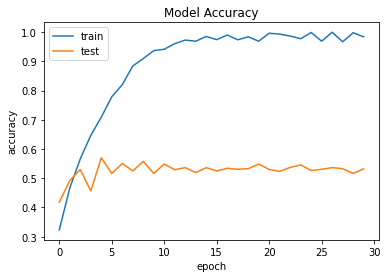

In [108]:
# plot for model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

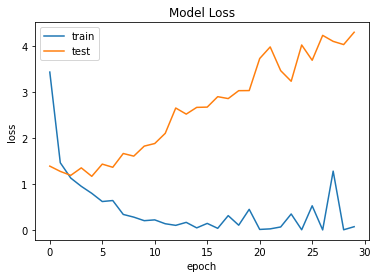

In [109]:
# plot for model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()